In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots 

In [3]:
train_data = pd.read_csv('./mymoviedb.csv', engine='python')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [5]:
train_data.shape

(9837, 9)

In [6]:
column_types = {'Title':'string', 'Overview':'string', 'Original_Language':'string'}

train_data_clean = pd.read_csv('./mymoviedb.csv', engine='python', dtype=column_types)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [8]:
train_data_clean = train_data_clean.drop(columns=['Poster_Url'])

In [9]:
train_data_clean = train_data_clean.drop(columns=['Overview'])

In [10]:
train_data_clean = train_data_clean.dropna()

In [32]:
train_data_clean["Popularity_Voting"] = train_data_clean["Popularity"] * (train_data_clean["Vote_Average"] * train_data_clean["Vote_Average"])

In [33]:
train_data_clean.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Popularity_Voting
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",350233.59106
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",251132.64138
2,2022-02-25,No Exit,2618.087,122,6.3,en,Thriller,103911.87303
3,2021-11-24,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",142426.49729
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",92880.03900


# Output Variable
    Genre
# Inputvariable
    Rest

In [12]:
train_data_clean.shape

(9826, 7)

In [13]:
print(train_data.isnull().sum())

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64


In [14]:
print(train_data_clean.isnull().sum())

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64


In [15]:
train_data.describe(include='all')

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
count,9837,9828,9828,9827.000000,9827,9827,9827,9826,9826
unique,5903,9514,9823,NaN,3267,75,44,2337,9826
top,2022-03-10,Beauty and the Beast,Dr. Raichi is one of the only survivors of the...,NaN,0,6.4,en,Drama,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
freq,16,4,2,NaN,100,435,7569,466,1
mean,NaN,NaN,NaN,40.320570,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,108.874308,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,7.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,16.127500,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,21.191000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,35.174500,NaN,NaN,NaN,NaN,NaN


In [16]:
train_data_clean.describe(include='all')

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
count,9826,9826,9826.000000,9826,9826,9826,9826
unique,5892,9512,NaN,3266,74,43,2337
top,2022-03-10,Alice in Wonderland,NaN,0,6.4,en,Drama
freq,16,4,NaN,100,435,7569,466
mean,NaN,NaN,40.323951,NaN,NaN,NaN,NaN
std,NaN,NaN,108.879332,NaN,NaN,NaN,NaN
min,NaN,NaN,13.354000,NaN,NaN,NaN,NaN
25%,NaN,NaN,16.128250,NaN,NaN,NaN,NaN
50%,NaN,NaN,21.195000,NaN,NaN,NaN,NaN
75%,NaN,NaN,35.179250,NaN,NaN,NaN,NaN


In [17]:
train_data_clean['Vote_Count'] = train_data_clean['Vote_Count'].astype(int)

In [18]:
train_data_clean['Release_Date'] = pd.to_datetime(train_data_clean['Release_Date'])

In [19]:
train_data_clean['Vote_Average'] = train_data_clean['Vote_Average'].astype(float)

In [20]:
train_data_clean['Genre'] = train_data_clean['Genre'].astype('string')

In [21]:
train_data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   string        
 2   Popularity         9826 non-null   float64       
 3   Vote_Count         9826 non-null   int32         
 4   Vote_Average       9826 non-null   float64       
 5   Original_Language  9826 non-null   string        
 6   Genre              9826 non-null   string        
dtypes: datetime64[ns](1), float64(2), int32(1), string(3)
memory usage: 575.7 KB


In [22]:
train_data_clean.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9826,9826.000000,9826.000000,9826.000000
mean,2006-09-23 04:47:14.276409600,40.323951,1392.943721,6.439467
min,1902-04-17 00:00:00,13.354000,0.000000,0.000000
25%,2000-10-17 12:00:00,16.128250,146.000000,5.900000
50%,2011-09-12 00:00:00,21.195000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.179250,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.954000,31077.000000,10.000000
std,NaN,108.879332,2611.303856,1.129797


In [23]:
train_data_clean_numeric=train_data_clean.select_dtypes(include=['number'])

In [24]:
train_data_clean_numeric.head()

,Popularity,Vote_Count,Vote_Average
0,5083.954,8940,8.3
1,3827.658,1151,8.1
2,2618.087,122,6.3
3,2402.201,5076,7.7
4,1895.511,1793,7.0


# Welche Orignalsprache haben die Filme im Datensatz

In [25]:
np.unique(train_data_clean['Original_Language'])

array(['ar', 'bn', 'ca', 'cn', 'cs', 'da', 'de', 'el', 'en', 'es', 'et',
       'eu', 'fa', 'fi', 'fr', 'he', 'hi', 'hu', 'id', 'is', 'it', 'ja',
       'ko', 'la', 'lv', 'ml', 'ms', 'nb', 'nl', 'no', 'pl', 'pt', 'ro',
       'ru', 'sr', 'sv', 'ta', 'te', 'th', 'tl', 'tr', 'uk', 'zh'],
      dtype=object)

# Die Sprachen
    ## Die einzigartigen Originalsprachen in Ihrem DataFrame sind:

1. Arabisch (ar)
2. Bengalisch (bn)
3. Katalanisch (ca)
4. Chinesisch (cn)
5. Tschechisch (cs)
6. Dänisch (da)
7. Deutsch (de)
8. Griechisch (el)
9. Englisch (en)
10. Spanisch (es)
11. Estnisch (et)
12. Baskisch (eu)
13. Persisch (fa)
14. Finnisch (fi)
15. Französisch (fr)
16. Hebräisch (he)
17. Hindi (hi)
18. Ungarisch (hu)
19. Indonesisch (id)
20. Isländisch (is)
21. Italienisch (it)
22. Japanisch (ja)
23. Koreanisch (ko)
24. Latein (la)
25. Lettisch (lv)
26. Malayalam (ml)
27. Malaiisch (ms)
28. Norwegisch Bokmål (nb)
29. Niederländisch (nl)
30. Norwegisch (no)
31. Polnisch (pl)
32. Portugiesisch (pt)
33. Rumänisch (ro)
34. Russisch (ru)
35. Serbisch (sr)
36. Schwedisch (sv)
37. Tamil (ta)
38. Telugu (te)
39. Thailändisch (th)
40. Tagalog (tl)
41. Türkisch (tr)
42. Ukrainisch (uk)
43. Chinesisch (zh)


# % der Sprachen im Datensatz

In [26]:
language_counts = train_data_clean['Original_Language'].value_counts()
percentage = (language_counts / train_data_clean['Original_Language'].size) * 100
print(percentage)

Original_Language
en    77.030328
ja     6.564217
es     3.450031
fr     2.971708
ko     1.730104
zh     1.312843
it     1.251781
cn     1.109302
ru     0.844698
de     0.834521
pt     0.376552
da     0.284958
no     0.264604
hi     0.264604
sv     0.234073
nl     0.213719
pl      0.17301
th      0.17301
id     0.152656
tr     0.152656
tl     0.081417
te     0.061062
el     0.050885
sr     0.050885
fi     0.050885
cs     0.040708
fa     0.030531
hu     0.030531
ta     0.020354
he     0.020354
ar     0.020354
uk     0.020354
ro     0.020354
is     0.020354
ca     0.010177
la     0.010177
nb     0.010177
bn     0.010177
ms     0.010177
lv     0.010177
eu     0.010177
ml     0.010177
et     0.010177
Name: count, dtype: Float64


# Genres aufgeteilt und Popularity addiert 
## z.B. Action ist das beliebteste Genre mit Popularity 125.823.226

In [27]:
genre_popularity = {}

# Durchlaufen Sie jede Zeile in Ihrem DataFrame
for i, row in train_data_clean.iterrows():
    # Split the 'Genre' string into a list of genres
    genres = row['Genre'].replace(" ", "").split(",")
    # popularity in int casten
    popularity = int(round(row["Popularity"]))
    
    # Add the popularity of the current movie to each of its genres
    for genre in genres:
        if genre in genre_popularity:
            genre_popularity[genre] += popularity
        else:
            genre_popularity[genre] = popularity

# Sortieren Sie das Dictionary nach Popularität in absteigender Reihenfolge
sorted_genres = sorted(genre_popularity.items(), key=lambda x: x[1], reverse=True)

# Drucken Sie das sortierte Dictionary aus
for genre, popularity in sorted_genres:
    print(f"{genre}: {popularity}")

Action: 136663
Comedy: 114795
Drama: 112622
Thriller: 106822
Adventure: 99560
Animation: 75392
Fantasy: 69425
Family: 65918
ScienceFiction: 63019
Horror: 56248
Crime: 55567
Romance: 45583
Mystery: 30995
History: 12136
War: 10871
Music: 9968
TVMovie: 6410
Documentary: 6288
Western: 4960


# durchschnittliche Beliebtheit für jedes Genre python

In [28]:
# Erstellen Sie ein leeres Dictionary, um die Gesamtpopularität und die Anzahl der Filme für jedes Genre zu speichern
genre_popularity = {}
genre_counts = {}

# Durchlaufen Sie jede Zeile in Ihrem DataFrame
for i, row in train_data_clean.iterrows():
    # Teilen Sie den 'Genre'-String in eine Liste von Genres auf
    genres = row['Genre'].split(', ')
    
    # Fügen Sie die Beliebtheit des aktuellen Films zu jedem seiner Genres hinzu und zählen Sie die Anzahl der Filme
    for genre in genres:
        if genre in genre_popularity:
            genre_popularity[genre] += row['Popularity']
            genre_counts[genre] += 1
        else:
            genre_popularity[genre] = row['Popularity']
            genre_counts[genre] = 1

# Berechnen Sie die durchschnittliche Beliebtheit für jedes Genre
average_popularity = {genre: genre_popularity[genre] / genre_counts[genre] for genre in genre_popularity}

# Sortieren Sie das Dictionary nach durchschnittlicher Beliebtheit in absteigender Reihenfolge
sorted_genres = sorted(average_popularity.items(), key=lambda x: x[1], reverse=True)

# Drucken Sie das sortierte Dictionary aus
for genre, popularity in sorted_genres:
    print(f"{genre}: {popularity}")

Adventure: 53.74288828926054
Fantasy: 53.08134174311917
Animation: 52.4276627260084
Action: 50.890132911392364
Science Fiction: 49.511333857030685
Family: 46.6106159830269
Crime: 44.74729549114323
Thriller: 42.94625763665597
Mystery: 40.09358990944373
Horror: 38.26449795918362
Comedy: 37.87366875618602
Western: 36.187912408759125
War: 35.29807467532467
Music: 33.77141016949153
Romance: 30.86603048780494
Drama: 30.077651442307708
TV Movie: 29.954714953271036
Documentary: 29.235376744186063
History: 28.3958266978923


### Die Frage “Was schaut die Welt am liebsten?” bezieht sich in der Regel auf das Genre, das die meisten Zuschauer oder die höchste Gesamtpopularität hat. Es geht darum, welches Genre insgesamt am meisten gesehen wird.

### Die “durchschnittliche Beliebtheit” eines Genres hingegen bezieht sich auf die durchschnittliche Beliebtheit der Filme innerhalb dieses Genres. Es ist möglich, dass ein Genre nur wenige, aber sehr beliebte Filme hat und daher eine hohe durchschnittliche Beliebtheit hat. Es ist aber auch möglich, dass ein Genre viele Filme hat, die nicht so beliebt sind, und daher eine niedrigere durchschnittliche Beliebtheit hat, obwohl es insgesamt mehr gesehen wird.

#  beliebtester film von jedem genre

In [145]:
# Erstellen Sie ein leeres Dictionary, um den beliebtesten Film jedes Genres zu speichern
most_popular_movies = {}

# Durchlaufen Sie jede Zeile in Ihrem DataFrame
for i, row in train_data_clean.iterrows():
    # Teilen Sie den 'Genre'-String in eine Liste von Genres auf
    genres = row['Genre'].split(', ')
    
    # Überprüfen Sie für jedes Genre, ob der aktuelle Film beliebter ist als der bisher gespeicherte Film
    for genre in genres:
        if genre not in most_popular_movies or row['Popularity'] > most_popular_movies[genre]['Popularity']:
            most_popular_movies[genre] = row

# Drucken Sie den beliebtesten Film jedes Genres aus
for genre, movie in most_popular_movies.items():
    print(f"{genre}: {movie['Title']} ({movie['Popularity']})")

Action: Spider-Man: No Way Home (5083.954)
Adventure: Spider-Man: No Way Home (5083.954)
Science Fiction: Spider-Man: No Way Home (5083.954)
Crime: The Batman (3827.658)
Mystery: The Batman (3827.658)
Thriller: The Batman (3827.658)
Animation: Encanto (2402.201)
Comedy: Encanto (2402.201)
Family: Encanto (2402.201)
Fantasy: Encanto (2402.201)
War: The King's Man (1895.511)
Horror: Scream (1675.161)
Drama: Nightmare Alley (1455.144)
Music: Sing 2 (1112.9)
Romance: Marry Me (761.793)
Western: Tom and Jerry: Cowboy Up! (614.11)
History: Chernobyl: Abyss (601.958)
TV Movie: Laura y el misterio del asesino inesperado (266.754)
Documentary: The Tinder Swindler (246.652)


# Beziehung zwischen Beliebtheit und Bewertung

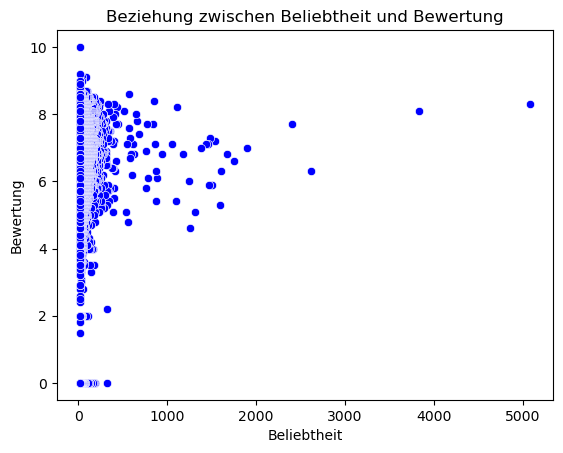

In [147]:
import matplotlib.pyplot as plt

# Erstellen Sie das Streudiagramm
sns.scatterplot(x='Popularity', y='Vote_Average', data=train_data_clean, color='blue')

# Fügen Sie Titel und Achsenbeschriftungen hinzu
plt.title('Beziehung zwischen Beliebtheit und Bewertung')
plt.xlabel('Beliebtheit')
plt.ylabel('Bewertung')

# Zeigen Sie das Diagramm an
plt.show()

# Beliebtheit im Laufe der Zeit

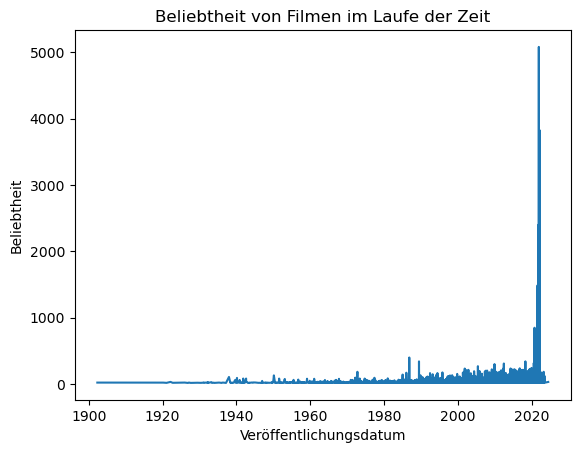

In [149]:
# Sortieren Sie das DataFrame nach dem Veröffentlichungsdatum
train_data_clean_sorted = train_data_clean.sort_values('Release_Date')

# Erstellen Sie das Liniendiagramm
plt.plot(train_data_clean_sorted['Release_Date'], train_data_clean_sorted['Popularity'])

# Fügen Sie Titel und Achsenbeschriftungen hinzu
plt.title('Beliebtheit von Filmen im Laufe der Zeit')
plt.xlabel('Veröffentlichungsdatum')
plt.ylabel('Beliebtheit')

# Zeigen Sie das Diagramm an
plt.show()